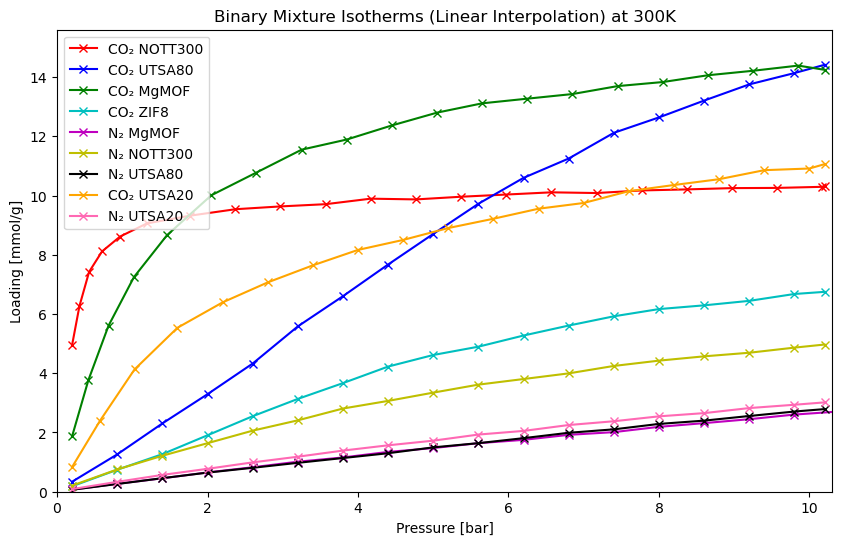

In [47]:
import pandas as pd
import pyiast
import matplotlib.pyplot as plt

# List of CSV filenames and corresponding colors
csv_files = [
    "/Users/ludovica/Documents/GitHub/Group04/Project/project - co2 nott300.csv", "/Users/ludovica/Documents/GitHub/Group04/Project/project - co2 utsa80.csv", "/Users/ludovica/Documents/GitHub/Group04/Project/project - co2-mgmof.csv", 
    "/Users/ludovica/Documents/GitHub/Group04/Project/project - co2-zif8.csv", "/Users/ludovica/Documents/GitHub/Group04/Project/project - n2 mgmof.csv", "/Users/ludovica/Documents/GitHub/Group04/Project/project - n2-nott300.csv", 
    "/Users/ludovica/Documents/GitHub/Group04/Project/project - n2-utsa80.csv", "/Users/ludovica/Documents/GitHub/Group04/Project/project - utsa20-co2.csv", "/Users/ludovica/Documents/GitHub/Group04/Project/project - n2 utsa20.csv" 
]

# labels for each isotherm
custom_labels = [
    "CO₂ NOTT300", "CO₂ UTSA80", "CO₂ MgMOF", "CO₂ ZIF8", 
    "N₂ MgMOF", "N₂ NOTT300", "N₂ UTSA80", "CO₂ UTSA20 ", "N₂ UTSA20"
]

# Colors for each isotherm
colors = ['r', 'b', 'g', 'c', 'm', 'y', 'k', 'orange', "#ff69b4"]

plt.figure(figsize=(10, 6))

# Iterate over the list of files, colors, and plot each isotherm
for i, (file, label) in enumerate(zip(csv_files, custom_labels)):
    # Load the CSV file
    df = pd.read_csv(file)
    
    # extract pressure and loading from the i file
    pressure = df["pressure(bar)"]
    loading = df["loading_abs_avg(mol/kg)"]
    
    # Create an instance of InterpolatorIsotherm for each file
    isotherm = pyiast.InterpolatorIsotherm(df,
                                           loading_key="loading_abs_avg(mol/kg)",
                                           pressure_key="pressure(bar)")
    
    # Get the interpolated loading values at the actual pressures in the file
    interpolated_loading = [isotherm.loading(p) for p in pressure]
    
    # Plot each isotherm with a unique color and custom label
    plt.plot(pressure, interpolated_loading, label=label, marker='x', color=colors[i])

# Customize plot
plt.title('Binary Mixture Isotherms (Linear Interpolation) at 300K')
plt.xlabel('Pressure [bar]')
plt.ylabel('Loading [mmol/g]')
plt.legend()
plt.grid(False)
plt.xlim(0, 10.3)  # Set x-limit based on the highest pressure in the data
plt.ylim(0, 15.6)  # Adjust y-limit based on your dataset range
plt.show()


In [49]:
import pandas as pd
import numpy as np
import pyiast

# Load the  isotherm data for CO₂ and N₂ in the same MOF
df_co2 = pd.read_csv("/Users/ludovica/Documents/GitHub/Group04/Project/project - co2 utsa80.csv") 
df_n2 = pd.read_csv("/Users/ludovica/Documents/GitHub/Group04/Project/project - n2-utsa80.csv")  

# Create InterpolatorIsotherm instances for CO₂ and N₂
co2_isotherm = pyiast.InterpolatorIsotherm(df_co2,
                                            loading_key="loading_abs_avg(mol/kg)",
                                            pressure_key="pressure(bar)")
n2_isotherm = pyiast.InterpolatorIsotherm(df_n2,
                                           loading_key="loading_abs_avg(mol/kg)",
                                           pressure_key="pressure(bar)")

# Define the total pressure and gas mole fractions for CO₂ and N₂
total_pressure = 1  
y_CO2 = 0.15 #from the provided values 
y_N2 = 0.85   

# calculate partial pressures and put them in an array so that pyiast.iast can read it 
partial_pressures = np.array([total_pressure * y_CO2, total_pressure * y_N2])

# Perform IAST calculation with arrays 
q = pyiast.iast(partial_pressures, [co2_isotherm, n2_isotherm])

# Calculate selectivity
selectivity = (q[0] * y_N2) / (q[1] * y_CO2) #q[0] corresponds to the co2 loading and q[1] to the n2 loadings in mol/kg


print(f"Selectivity of CO₂ over N₂ at {total_pressure} bar in USTA80: {selectivity:.2f}")


Selectivity of CO₂ over N₂ at 1 bar in USTA80: 5.10


In [58]:
import pandas as pd
import numpy as np
import pyiast

# Load the pure-component isotherm data for CO₂ and N₂
df_co2 = pd.read_csv("/Users/ludovica/Documents/GitHub/Group04/Project/project - utsa20-co2.csv")  
df_n2 = pd.read_csv("/Users/ludovica/Documents/GitHub/Group04/Project/project - n2 utsa20.csv")  

# Create InterpolatorIsotherm instances for CO₂ and N₂
co2_isotherm = pyiast.InterpolatorIsotherm(df_co2,
                                            loading_key="loading_abs_avg(mol/kg)",
                                            pressure_key="pressure(bar)")
n2_isotherm = pyiast.InterpolatorIsotherm(df_n2,
                                           loading_key="loading_abs_avg(mol/kg)",
                                           pressure_key="pressure(bar)")

# Define the total pressure and gas mole fractions for CO₂ and N₂
total_pressure = 1  
y_CO2 = 0.15 #from the provided values 
y_N2 = 0.85   

# calculate partial pressures and put them in an array so that pyiast.iast can read it 
partial_pressures = np.array([total_pressure * y_CO2, total_pressure * y_N2])

# Perform IAST calculation with arrays 
q = pyiast.iast(partial_pressures, [co2_isotherm, n2_isotherm])

# Calculate selectivity
selectivity = (q[0] * y_N2) / (q[1] * y_CO2) #q[0] corresponds to the co2 loading and q[1] to the n2 loadings in mol/kg

# Print the results
print(f"Selectivity of CO₂ over N₂ at {total_pressure} bar in USTA20: {selectivity:.2f}")


Selectivity of CO₂ over N₂ at 1 bar in USTA20: 10.21


In [59]:
import pandas as pd
import numpy as np
import pyiast

# Load the pure-component isotherm data for CO₂ and N₂
df_co2 = pd.read_csv("/Users/ludovica/Documents/GitHub/Group04/Project/project - co2 nott300.csv") 
df_n2 = pd.read_csv("/Users/ludovica/Documents/GitHub/Group04/Project/project - n2-nott300.csv") 

# Create InterpolatorIsotherm instances for CO₂ and N₂
co2_isotherm = pyiast.InterpolatorIsotherm(df_co2,
                                            loading_key="loading_abs_avg(mol/kg)",
                                            pressure_key="pressure(bar)")
n2_isotherm = pyiast.InterpolatorIsotherm(df_n2,
                                           loading_key="loading_abs_avg(mol/kg)",
                                           pressure_key="pressure(bar)")

# Define the total pressure and gas mole fractions for CO₂ and N₂
total_pressure = 1  
y_CO2 = 0.15 #from the provided values 
y_N2 = 0.85   

# calculate partial pressures and put them in an array so that pyiast.iast can read it 
partial_pressures = np.array([total_pressure * y_CO2, total_pressure * y_N2])

# Perform IAST calculation with arrays 
q = pyiast.iast(partial_pressures, [co2_isotherm, n2_isotherm])

# Calculate selectivity
selectivity = (q[0] * y_N2) / (q[1] * y_CO2) #q[0] corresponds to the co2 loading and q[1] to the n2 loadings in mol/kg


print(f"Selectivity of CO₂ over N₂ at {total_pressure} bar in NOTT300: {selectivity:.2f}")


Selectivity of CO₂ over N₂ at 1 bar in NOTT300: 30.98


In [60]:
import pandas as pd
import numpy as np
import pyiast

# Load the pure-component isotherm data for CO₂ and N₂
df_co2 = pd.read_csv("/Users/ludovica/Documents/GitHub/Group04/Project/project - co2-mgmof.csv")  
df_n2 = pd.read_csv("/Users/ludovica/Documents/GitHub/Group04/Project/project - n2 mgmof.csv")  

# Create InterpolatorIsotherm instances for CO₂ and N₂
co2_isotherm = pyiast.InterpolatorIsotherm(df_co2,
                                            loading_key="loading_abs_avg(mol/kg)",
                                            pressure_key="pressure(bar)")
n2_isotherm = pyiast.InterpolatorIsotherm(df_n2,
                                           loading_key="loading_abs_avg(mol/kg)",
                                           pressure_key="pressure(bar)")

# Define the total pressure and gas mole fractions for CO₂ and N₂
total_pressure = 1  
y_CO2 = 0.15 #from the provided values 
y_N2 = 0.85   

# calculate partial pressures and put them in an array so that pyiast.iast can read it 
partial_pressures = np.array([total_pressure * y_CO2, total_pressure * y_N2])

# Perform IAST calculation with arrays 
q = pyiast.iast(partial_pressures, [co2_isotherm, n2_isotherm])

# Calculate selectivity
selectivity = (q[0] * y_N2) / (q[1] * y_CO2) #q[0] corresponds to the co2 loading and q[1] to the n2 loadings in mol/kg


print(f"Selectivity of CO₂ over N₂ at {total_pressure} bar in MgMOF: {selectivity:.2f}")


Selectivity of CO₂ over N₂ at 1 bar in MgMOF: 29.45


In [67]:
import pandas as pd
import numpy as np
import pyiast

# Load the pure-component isotherm data for CO₂ and N₂
df_co2 = pd.read_csv("/Users/ludovica/Documents/GitHub/Group04/Project/project - co2 utsa80.csv")  
df_n2 = pd.read_csv("/Users/ludovica/Documents/GitHub/Group04/Project/project - n2-utsa80.csv")  

# Create InterpolatorIsotherm instances for CO₂ and N₂
co2_isotherm = pyiast.InterpolatorIsotherm(df_co2,
                                            loading_key="loading_abs_avg(mol/kg)",
                                            pressure_key="pressure(bar)")
n2_isotherm = pyiast.InterpolatorIsotherm(df_n2,
                                           loading_key="loading_abs_avg(mol/kg)",
                                           pressure_key="pressure(bar)")

# Define the total pressures and gas mole fractions for CO₂ and N₂
total_pressure_adsorption = 1.0  # Total pressure for adsorption (bar)
total_pressure_desorption = 0.2   # Total pressure for desorption (bar)
y_CO2 = 0.15 
y_N2 = 0.85   

# Calculate the partial pressures at 1 bar and 0.2 bar and put them in arrays 
partial_pressures_adsorption = np.array([total_pressure_adsorption * y_CO2, total_pressure_adsorption * y_N2])
partial_pressures_desorption = np.array([total_pressure_desorption * y_CO2, total_pressure_desorption * y_N2])

# Perform IAST calculations for both pressures
q_adsorption = pyiast.iast(partial_pressures_adsorption, [co2_isotherm, n2_isotherm])
q_desorption = pyiast.iast(partial_pressures_desorption, [co2_isotherm, n2_isotherm])

# Calculate working capacity according to given formula 
working_capacity = q_adsorption[0] - q_desorption[0]  # q[0] corresponds to CO₂ loading


print(f"Working Capacity of CO₂ in USTA80: {working_capacity:.2f} mol/kg")


Working Capacity of CO₂ in USTA80: 0.20 mol/kg


In [63]:
import pandas as pd
import numpy as np
import pyiast

# Load the pure-component isotherm data for CO₂ and N₂
df_co2 = pd.read_csv("/Users/ludovica/Documents/GitHub/Group04/Project/project - utsa20-co2.csv")  
df_n2 = pd.read_csv("/Users/ludovica/Documents/GitHub/Group04/Project/project - n2 utsa20.csv")

# Create InterpolatorIsotherm instances for CO₂ and N₂
co2_isotherm = pyiast.InterpolatorIsotherm(df_co2,
                                            loading_key="loading_abs_avg(mol/kg)",
                                            pressure_key="pressure(bar)")
n2_isotherm = pyiast.InterpolatorIsotherm(df_n2,
                                           loading_key="loading_abs_avg(mol/kg)",
                                           pressure_key="pressure(bar)")

# Define the total pressures and gas mole fractions for CO₂ and N₂
total_pressure_adsorption = 1.0  # Total pressure for adsorption (bar)
total_pressure_desorption = 0.2   # Total pressure for desorption (bar)
y_CO2 = 0.15 
y_N2 = 0.85   

# Calculate the partial pressures at 1 bar and 0.2 bar and put them in arrays 
partial_pressures_adsorption = np.array([total_pressure_adsorption * y_CO2, total_pressure_adsorption * y_N2])
partial_pressures_desorption = np.array([total_pressure_desorption * y_CO2, total_pressure_desorption * y_N2])

# Perform IAST calculations for both pressures
q_adsorption = pyiast.iast(partial_pressures_adsorption, [co2_isotherm, n2_isotherm])
q_desorption = pyiast.iast(partial_pressures_desorption, [co2_isotherm, n2_isotherm])

# Calculate working capacity according to given formula 
working_capacity = q_adsorption[0] - q_desorption[0]  # q[0] corresponds to CO₂ loading


print(f"Working Capacity of CO₂ in USTA20: {working_capacity:.2f} mol/kg")


Working Capacity of CO₂ in USTA20: 0.49 mol/kg


In [64]:
import pandas as pd
import numpy as np
import pyiast

# Load the pure-component isotherm data for CO₂ and N₂
df_co2 = pd.read_csv("/Users/ludovica/Documents/GitHub/Group04/Project/project - co2 nott300.csv")  
df_n2 = pd.read_csv("/Users/ludovica/Documents/GitHub/Group04/Project/project - n2-nott300.csv")

# Create InterpolatorIsotherm instances for CO₂ and N₂
co2_isotherm = pyiast.InterpolatorIsotherm(df_co2,
                                            loading_key="loading_abs_avg(mol/kg)",
                                            pressure_key="pressure(bar)")
n2_isotherm = pyiast.InterpolatorIsotherm(df_n2,
                                           loading_key="loading_abs_avg(mol/kg)",
                                           pressure_key="pressure(bar)")

# Define the total pressures and gas mole fractions for CO₂ and N₂
total_pressure_adsorption = 1.0  # Total pressure for adsorption (bar)
total_pressure_desorption = 0.2   # Total pressure for desorption (bar)
y_CO2 = 0.15 
y_N2 = 0.85   

# Calculate the partial pressures at 1 bar and 0.2 bar and put them in arrays 
partial_pressures_adsorption = np.array([total_pressure_adsorption * y_CO2, total_pressure_adsorption * y_N2])
partial_pressures_desorption = np.array([total_pressure_desorption * y_CO2, total_pressure_desorption * y_N2])

# Perform IAST calculations for both pressures
q_adsorption = pyiast.iast(partial_pressures_adsorption, [co2_isotherm, n2_isotherm])
q_desorption = pyiast.iast(partial_pressures_desorption, [co2_isotherm, n2_isotherm])

# Calculate working capacity according to given formula 
working_capacity = q_adsorption[0] - q_desorption[0]  # q[0] corresponds to CO₂ loading

print(f"Working Capacity of CO₂ in NOTT300: {working_capacity:.2f} mol/kg")


Working Capacity of CO₂ in NOTT300: 2.85 mol/kg


In [66]:
import pandas as pd
import numpy as np
import pyiast

# Load the pure-component isotherm data for CO₂ and N₂
df_co2 = pd.read_csv("/Users/ludovica/Documents/GitHub/Group04/Project/project - co2-mgmof.csv") 
df_n2 = pd.read_csv("/Users/ludovica/Documents/GitHub/Group04/Project/project - n2 mgmof.csv")  

# Create InterpolatorIsotherm instances for CO₂ and N₂
co2_isotherm = pyiast.InterpolatorIsotherm(df_co2,
                                            loading_key="loading_abs_avg(mol/kg)",
                                            pressure_key="pressure(bar)")
n2_isotherm = pyiast.InterpolatorIsotherm(df_n2,
                                           loading_key="loading_abs_avg(mol/kg)",
                                           pressure_key="pressure(bar)")

# Define the total pressures and gas mole fractions for CO₂ and N₂
total_pressure_adsorption = 1.0  # Total pressure for adsorption (bar)
total_pressure_desorption = 0.2   # Total pressure for desorption (bar)
y_CO2 = 0.15 
y_N2 = 0.85   

# Calculate the partial pressures at 1 bar and 0.2 bar and put them in arrays 
partial_pressures_adsorption = np.array([total_pressure_adsorption * y_CO2, total_pressure_adsorption * y_N2])
partial_pressures_desorption = np.array([total_pressure_desorption * y_CO2, total_pressure_desorption * y_N2])

# Perform IAST calculations for both pressures
q_adsorption = pyiast.iast(partial_pressures_adsorption, [co2_isotherm, n2_isotherm])
q_desorption = pyiast.iast(partial_pressures_desorption, [co2_isotherm, n2_isotherm])

# Calculate working capacity according to given formula 
working_capacity = q_adsorption[0] - q_desorption[0]  # q[0] corresponds to CO₂ loading
print(f"Working Capacity of CO₂ in MgMOF: {working_capacity:.2f} mol/kg")


Working Capacity of CO₂ in MgMOF: 1.10 mol/kg
